In [1]:
from IPython.display import Image, display

datadir = 'data/'
imagesdir = 'images/'

def display_images(images, dir=imagesdir):
    for image in images:
        display(Image(dir + image))

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
%matplotlib inline

In [3]:
infile = datadir + 'Teams2020.csv'
bball = pd.read_csv(infile)

# Part 1

In your notebook, address this question: Explore the relationship between the number of runs scored, the number of opponents' runs scored, and the team's success. Team success is reflected in such measures as winning percentage and whether the team won the league penant.

In [4]:
def select_year_range(df, start_year, end_year=10000):
    """
    Returns rows of dataframe df whose yearID lies in given range of years.
    """
    return df[(df['yearID'] >= start_year) & (df['yearID'] <= end_year)]
bball_df = select_year_range(bball, 2000)
bball_df.head(5)

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
2325,2000,AL,ANA,ANA,W,3,162,81.0,82,80,...,182,0.978,Anaheim Angels,Edison International Field,2066982.0,102,103,ANA,ANA,ANA
2326,2000,NL,ARI,ARI,W,3,162,81.0,85,77,...,138,0.982,Arizona Diamondbacks,Bank One Ballpark,2942251.0,105,103,ARI,ARI,ARI
2327,2000,NL,ATL,ATL,E,1,162,81.0,95,67,...,138,0.979,Atlanta Braves,Turner Field,3234304.0,101,99,ATL,ATL,ATL
2328,2000,AL,BAL,BAL,E,4,162,81.0,74,88,...,151,0.981,Baltimore Orioles,Oriole Park at Camden Yards,3297031.0,95,96,BAL,BAL,BAL
2329,2000,AL,BOS,BOS,E,2,162,81.0,85,77,...,120,0.982,Boston Red Sox,Fenway Park II,2585895.0,104,103,BOS,BOS,BOS


In [5]:
display(bball.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2955 entries, 0 to 2954
Data columns (total 48 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yearID          2955 non-null   int64  
 1   lgID            2905 non-null   object 
 2   teamID          2955 non-null   object 
 3   franchID        2955 non-null   object 
 4   divID           1438 non-null   object 
 5   Rank            2955 non-null   int64  
 6   G               2955 non-null   int64  
 7   Ghome           2556 non-null   float64
 8   W               2955 non-null   int64  
 9   L               2955 non-null   int64  
 10  DivWin          1410 non-null   object 
 11  WCWin           774 non-null    object 
 12  LgWin           2927 non-null   object 
 13  WSWin           2598 non-null   object 
 14  R               2955 non-null   int64  
 15  AB              2955 non-null   int64  
 16  H               2955 non-null   int64  
 17  2B              2955 non-null   i

None

In [6]:
bball_df.dropna(how='any')
print('Nbr records with valid data since 2000: {0}'.format(len(bball_df)))

Nbr records with valid data since 2000: 630


In [7]:
bball["name"].value_counts()

Cincinnati Reds          130
Pittsburgh Pirates       130
Philadelphia Phillies    129
St. Louis Cardinals      121
Detroit Tigers           120
                        ... 
Chicago Pirates            1
Elizabeth Resolutes        1
Indianapolis Blues         1
Washington Statesmen       1
Buffalo Buffeds            1
Name: name, Length: 139, dtype: int64

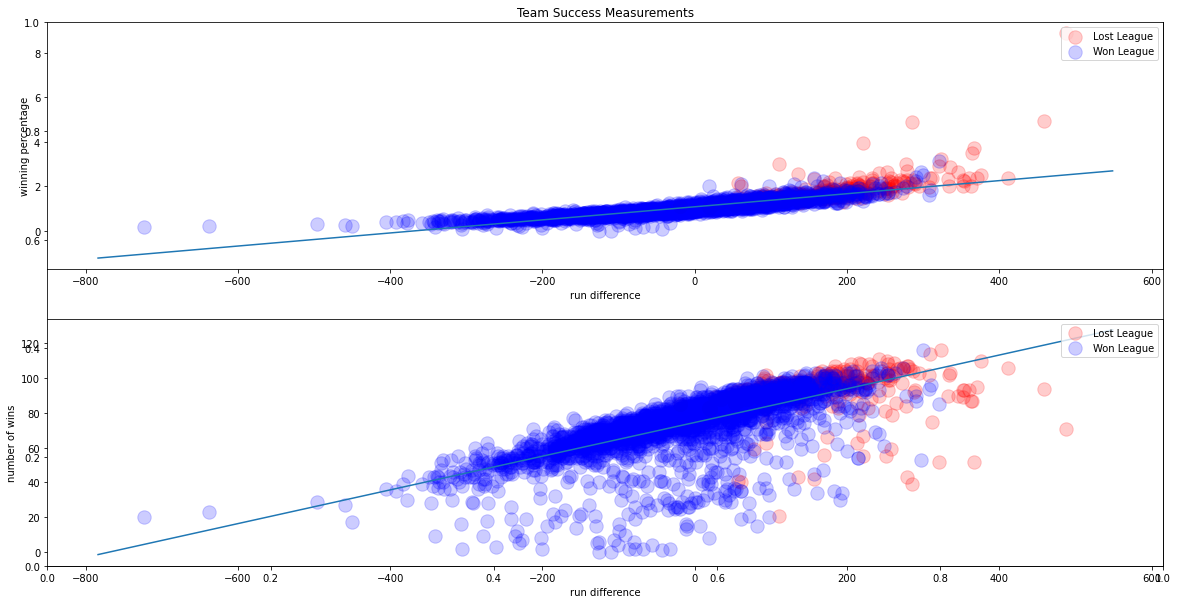

In [26]:
pd.options.mode.chained_assignment = None
bball['winPercentage'] = bball.W / (bball.L).astype(float)
bball.head(5)

bball['runDifference'] = bball.R - bball.RA

def plot():
    won_league=bball[bball.LgWin == 'Y']
    lost_league=bball[bball.LgWin == 'N']
    fig = plt.figure(figsize = (20,10))
    legendStr = ['Won League', 'Lost League']
    plt.title('Team Success Measurements')
    axes1 = fig.add_subplot (2,1,1)
    axes2 = fig.add_subplot (2,1,2)
    axes1.scatter(won_league.runDifference, won_league.winPercentage, c ='r', s= 180, alpha= 0.2, label = legendStr[1])
    axes1.scatter(lost_league.runDifference, lost_league.winPercentage, c = 'b', s = 180, alpha=0.2, label = legendStr[0])
    axes2.scatter(won_league.runDifference, won_league.W, c='r', s=180, alpha=0.2, label=legendStr[1])
    axes2.scatter(lost_league.runDifference,lost_league.W, c='b', s=180, alpha=0.2, label=legendStr[0])
    
    m2,b2 = np.polyfit(bball.runDifference, bball.W,1)
    m,b = np.polyfit(bball.runDifference, bball.winPercentage,1)
    X_plot = np.linspace(axes1.get_xlim()[0], axes1.get_xlim()[1],100)
    axes1.plot(X_plot, m*X_plot + b)
    axes2.plot(X_plot, m2*X_plot + b2)
    axes1.legend(loc = 'upper right')
    axes1.set_xlabel('run difference')
    axes1.set_ylabel('winning percentage')
    axes2.legend(loc='upper right')
    axes2.set_xlabel('run difference')
    axes2.set_ylabel('number of wins')
   
    plt.show()  
plot() 

# Part 2

Pose a second interesting question and explore it. Note you can look into use of some of the other baseball datasets for this part of the assignment.

How many teams hit 40 2Bs, 10 3Bs, 200 Hits, and 30 HRs?



In [9]:

len(bball[(bball['2B']>=40) & (bball['3B']>=10) & (bball['H']>=200) & (bball['HR']>=30)]['teamID'].unique())

78

What team had the most hits from 2000 to 2021?



In [10]:
bball[(bball['yearID']>=2000) & (bball['yearID']<=2020)].groupby(['teamID','name'])['H'].sum().to_frame('totalH').nlargest(columns='totalH',n=1)                              

,,totalH
teamID,name,
BOS,Boston Red Sox,31206


What team had the most 3Bs (in total) in 2002, 2004, 2010, 2020?

In [11]:
threebs=bball[bball['yearID'].isin([2002,2004,2010,2020])].groupby(['teamID','name'])['3B'].sum().to_frame('total3B')
threebs.sort_values(['total3B'],ascending=False).head(1)

,,total3B
teamID,name,
COL,Colorado Rockies,145


Now, is there a correlation between HR and success?

In [12]:
bball

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,winPercentage,runDifference
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1,2.000000,98
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1,2.111111,61
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1,0.526316,-92
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1,0.583333,-106
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2,0.941176,-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2950,2020,NL,SLN,STL,C,3,58,27.0,30,28,...,St. Louis Cardinals,Busch Stadium III,0.0,97,96,STL,SLN,SLN,1.071429,11
2951,2020,AL,TBA,TBD,E,1,60,29.0,40,20,...,Tampa Bay Rays,Tropicana Field,0.0,96,95,TBR,TBA,TBA,2.000000,60
2952,2020,AL,TEX,TEX,W,5,60,30.0,22,38,...,Texas Rangers,Globe Life Field,0.0,102,102,TEX,TEX,TEX,0.578947,-88
2953,2020,AL,TOR,TOR,E,3,60,26.0,32,28,...,Toronto Blue Jays,Sahlen Field,0.0,100,99,TOR,TOR,TOR,1.142857,-10


In [13]:
list(bball.columns)
bball.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,winPercentage,runDifference
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1,2.000000,98
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1,2.111111,61
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1,0.526316,-92
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1,0.583333,-106
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2,0.941176,-11


In [14]:
bball['HR'] = bball['HR'].astype('H')
bball.describe(include='H')

,HR
count,2955.000000
mean,104.929272
std,63.548616
min,0.000000
25%,45.000000
50%,109.000000
75%,153.000000
max,307.000000


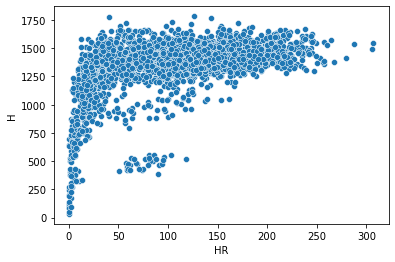

In [15]:
import seaborn as sns
sns.scatterplot(x= "HR", y="H", data= bball);

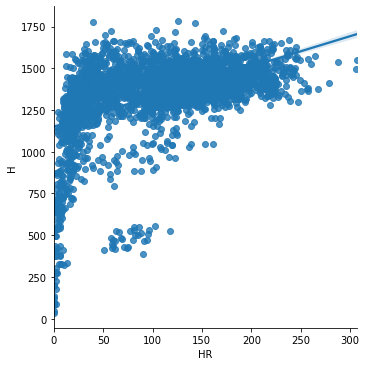

In [16]:
sns.lmplot(x="HR", y="H", data=bball);
